importing important libraries

Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

### EDA AND DATA VISUALIZATION

In [ ]:
 !pip install Jinja2

In [ ]:
from sklearn.metrics import precision_score


In [ ]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns  # Importing seaborn for enhanced data visualization
import plotly.express as px ## for plotting
import plotly.graph_objects as go ## for plotting
from plotly.subplots import make_subplots ## for plottingimport warnings  # Importing warnings to handle warning messages
import numpy as np  # Importing numpy for numerical operations
from sklearn.feature_selection import SelectKBest, f_classif  # Importing feature selection methods
from sklearn.utils import resample  # Importing resample for data resampling
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier for K-Nearest Neighbors algorithm
from sklearn.metrics import accuracy_score  # Importing accuracy_score for model evaluation
from sklearn.model_selection import cross_val_score  # Importing cross_val_score for cross-validation
from sklearn.metrics import classification_report  # Importing classification_report for model evaluation
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.pipeline import make_pipeline  # Importing make_pipeline for creating a pipeline of preprocessing and modeling steps
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix for model evaluation
import numpy as np  # Importing numpy for numerical operations
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, MultinomialNB# Importing GaussianNB for Naive Bayes algorithm
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.metrics import classification_report  # Importing classification_report for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for Random Forest algorithm
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for logistic regression algorithm
from sklearn.pipeline import Pipeline  # Importing Pipeline for creating a pipeline of preprocessing and modeling steps
from sklearn.model_selection import learning_curve  # Importing learning_curve for plotting learning curves
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for decision tree algorithm
from sklearn.feature_selection import VarianceThreshold  # For variance-based feature selection


In [ ]:
data=pd.read_csv('heart.csv') ## read data

In [ ]:
data.head() ## show first 5 rows and make sure data is loaded correctly

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info() ## show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().sum() ## check for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

observition: no missigng values in the data

In [ ]:
data.describe() ## show data description

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print(data.shape) ## show data shape

(918, 12)


Exploratory data analysis (EDA) : is used to analyze and investigate data sets and summarize their main characteristics

In [ ]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

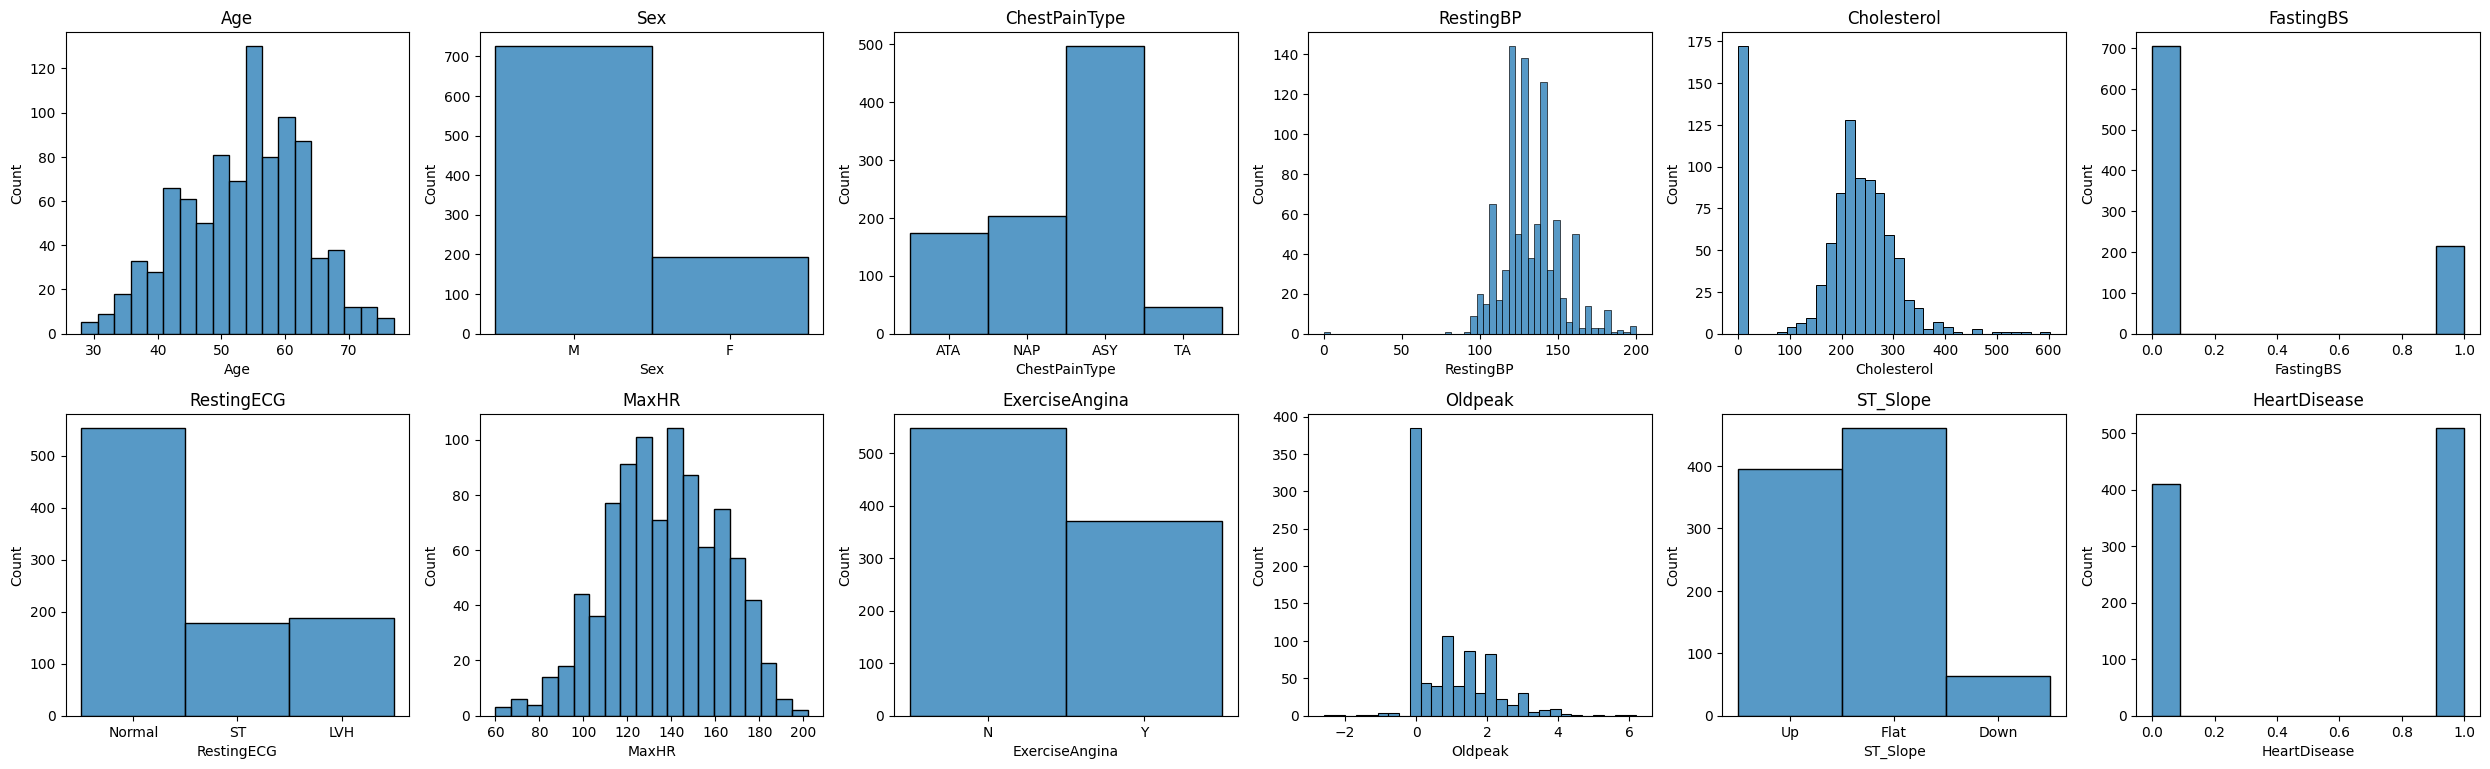

In [ ]:
## visualizing the every col in the main data
eda_df=data.copy()
plt.figure(figsize=(25,15))
for i ,col in enumerate(eda_df.columns):
    plt.subplot(4,6,i+1)
    sns.histplot(data=eda_df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()


In [ ]:
px.histogram(data,x='Sex',color='HeartDisease',template='seaborn',barmode='group',title='Distribution of sick and the healthy')

Observations:
- Males represent the majority of the patients.
- Males have the highest number of heart diseases.
- The number of healthy women is larger than the number of unhealthy women.


In [ ]:
ChestPainType = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts().sort_values(ascending=False)
ChestPainType

ASY    392
NAP     72
ATA     24
TA      20
Name: ChestPainType, dtype: int64

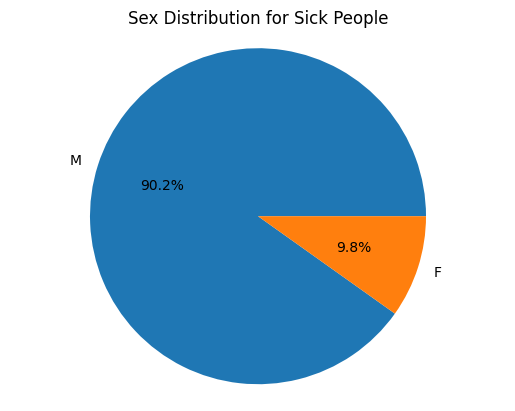

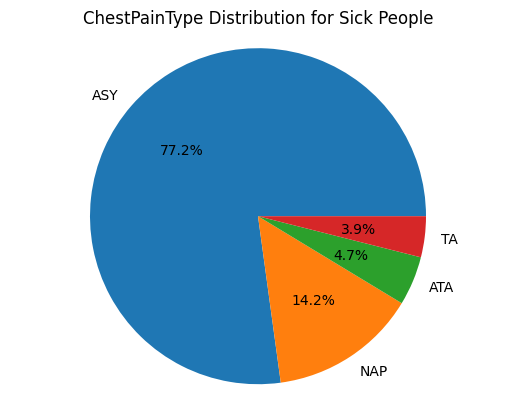

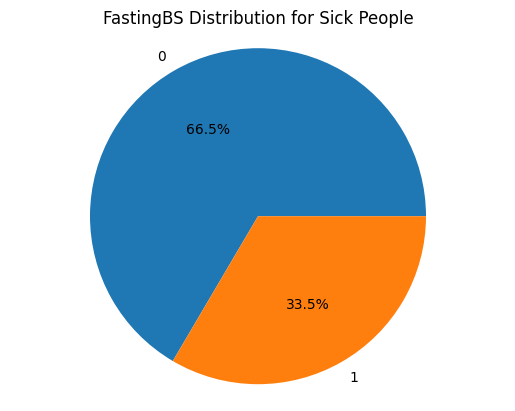

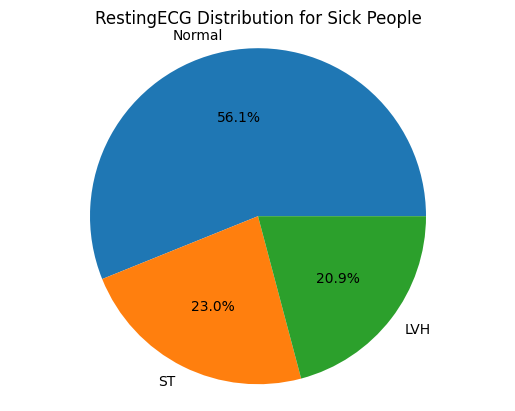

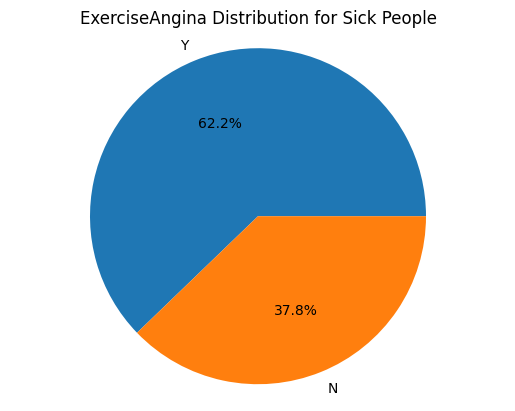

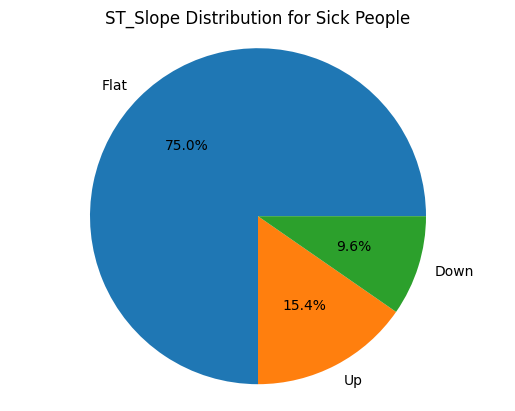

In [ ]:
# List of features to visualize
features = data.columns

# Exclude the 'HeartDisease' feature along with other specified numerical  features
exclude_features = ['HeartDisease', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']s
features = [feature for feature in features if feature not in exclude_features]

# Iterate over each feature
for feature in features:
    # Compute the count of each category for the current feature
    category_counts = data[data['HeartDisease'] == 1][feature].value_counts()

    # Create a pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'{feature} Distribution for Sick People')
    plt.axis('equal')

    # Display the chart
    plt.show()


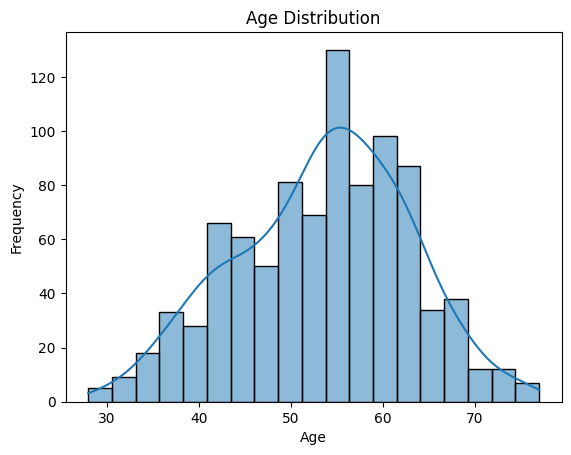

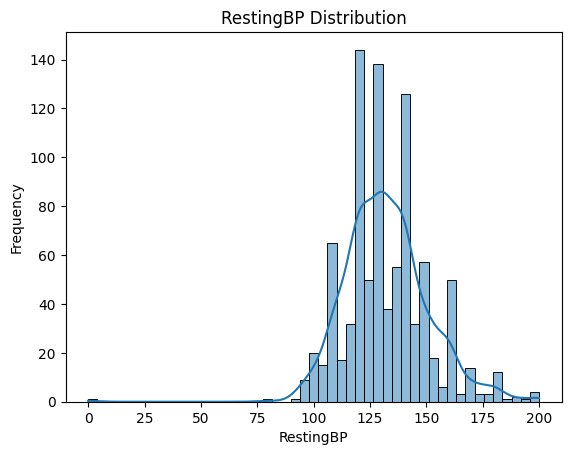

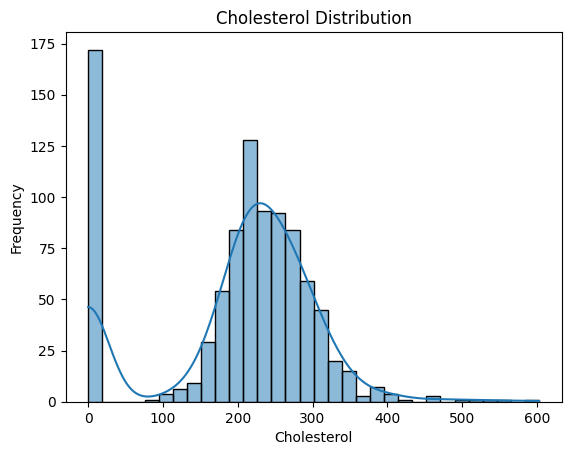

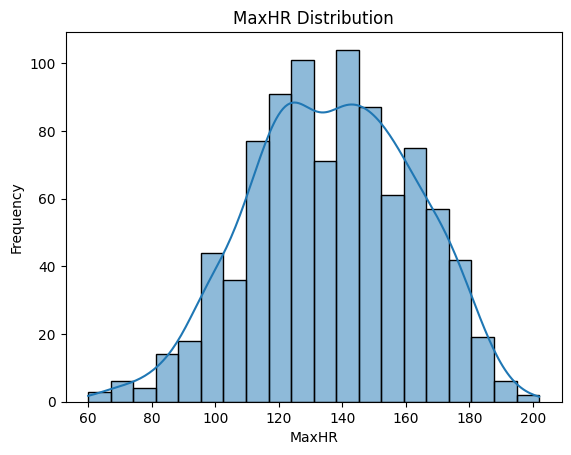

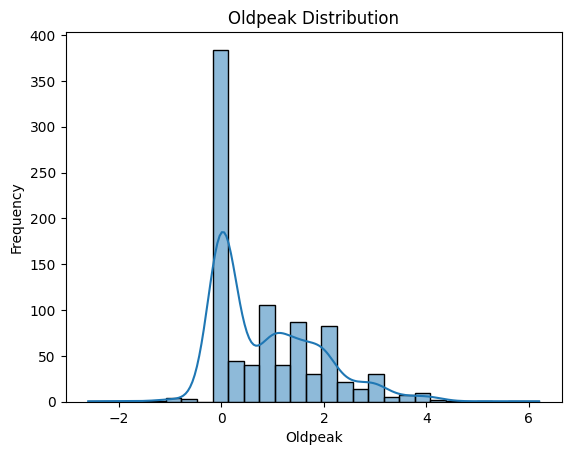

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from correlation calculation
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
numeric_data = data[numeric_features]

# Iterate over each numeric feature
for feature in numeric_data.columns:
    # Create a histogram plot using seaborn
    sns.histplot(data=numeric_data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')

    # Display the plot
    plt.show()


- STAGE2: DATA PREPROCESSING

In [ ]:
##CHECK FOR DUPLICATES
data.duplicated().sum()

0

OBSERVITIONS: NO DUPLICATED ROWS IN THE DATA

------------

In [ ]:
label_mappings = {}

# Loop through the DataFrame and convert string values to categorical representations
for column in data.columns:
    if data[column].dtype == object:  # Check if the column contains string values
        data[column], unique_values = pd.factorize(data[column])

        # Store the mappings of numeric labels to string values
        label_mappings[column] = dict(zip(range(len(unique_values)), unique_values))

# Print the mappings of numeric labels to string values
for column, mappings in label_mappings.items():
    print("Numeric labels for column", column)
    for label, value in mappings.items():
        print(label, "->", value)
    print()

Numeric labels for column Sex
0 -> M
1 -> F

Numeric labels for column ChestPainType
0 -> ATA
1 -> NAP
2 -> ASY
3 -> TA

Numeric labels for column RestingECG
0 -> Normal
1 -> ST
2 -> LVH

Numeric labels for column ExerciseAngina
0 -> N
1 -> Y

Numeric labels for column ST_Slope
0 -> Up
1 -> Flat
2 -> Down



In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


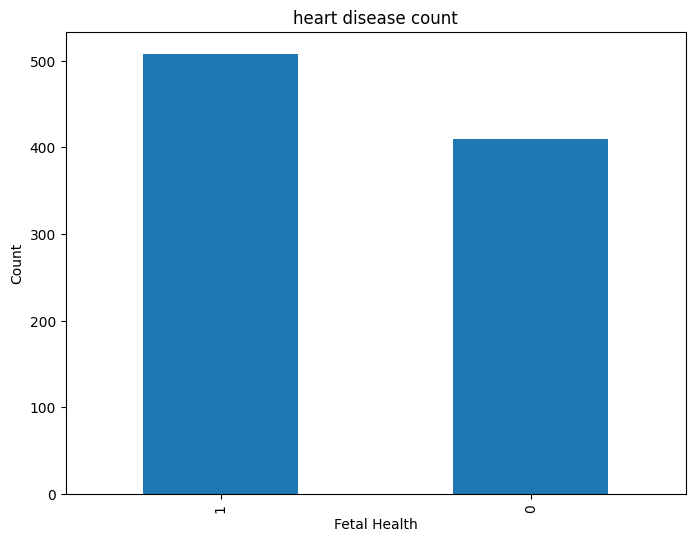

In [ ]:
#visiualizing the target col
plt.figure(figsize=(8,6))
data['HeartDisease'].value_counts().plot(kind='bar')
plt.title("heart disease count")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

### Data Outliers Analysis


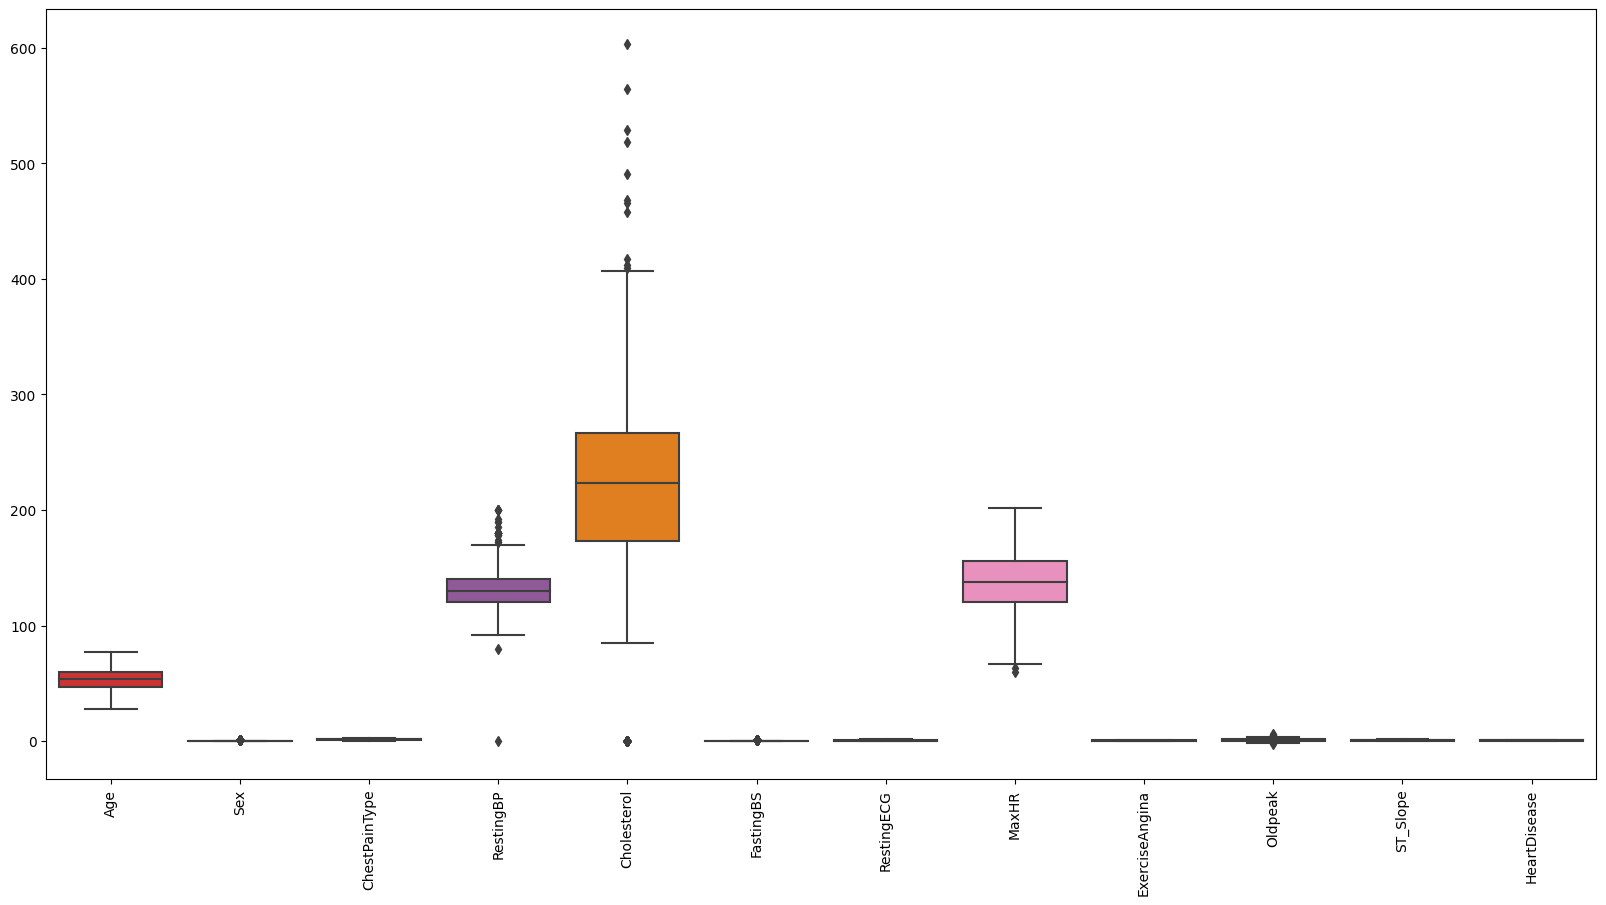

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = "Set1" )
plt.xticks(rotation=90)
plt.show()

In [ ]:
def remove_outliers_tukey(att, data):
    # Calculate the 1st and 3rd quartiles of the attribute
    q1 = np.percentile(att, 25)
    q3 = np.percentile(att, 75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Set the lower and upper bounds for outliers removal using the Tukey's method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Print the lower and upper bounds for reference
    print('lower_bound: ', lower_bound, '-------- upper_bound: ', upper_bound)

    # Remove outliers by selecting data within the bounds
    data1 = data[(att > lower_bound) & (att < upper_bound)]

    # Calculate the number of removed outliers
    num_outliers_removed = data.shape[0] - data1.shape[0]

    # Print the number of removed outliers and the total number of data points
    print(num_outliers_removed, ' number of outliers removed from ', data.shape[0])
    print('******************************************************\n')

    # Return the data without outliers
    return data1

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [ ]:
data = remove_outliers_tukey(data.Cholesterol, data)
data = remove_outliers_tukey(data.MaxHR, data)
data = remove_outliers_tukey(data.RestingBP, data)

lower_bound:  32.625 -------- upper_bound:  407.625
183  number of outliers removed from  918
******************************************************

lower_bound:  65.0 -------- upper_bound:  217.0
0  number of outliers removed from  735
******************************************************

lower_bound:  90.0 -------- upper_bound:  170.0
32  number of outliers removed from  735
******************************************************



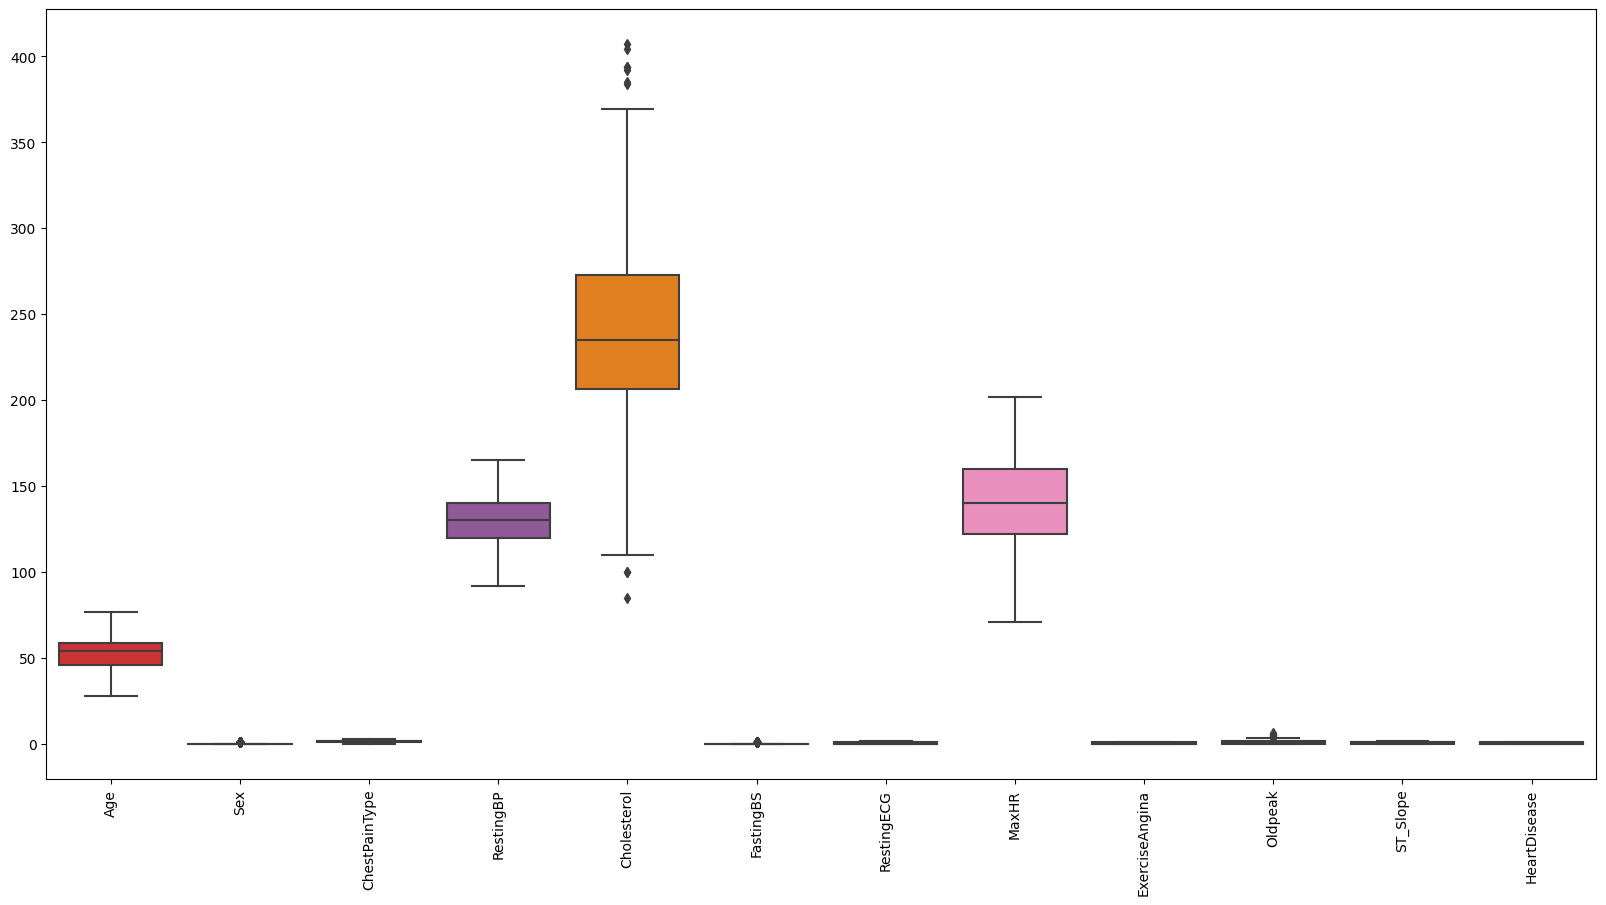

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

### Data Balancing

Text(0, 0.5, 'Count')

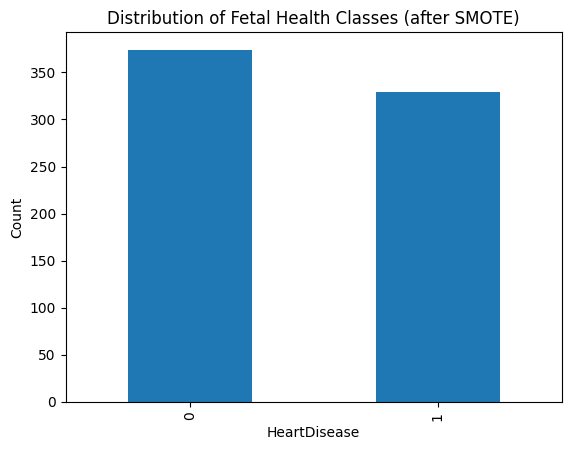

In [ ]:
data['HeartDisease'].value_counts().plot(kind='bar')
plt.title("Distribution of Fetal Health Classes (after SMOTE)")
plt.xlabel("HeartDisease")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

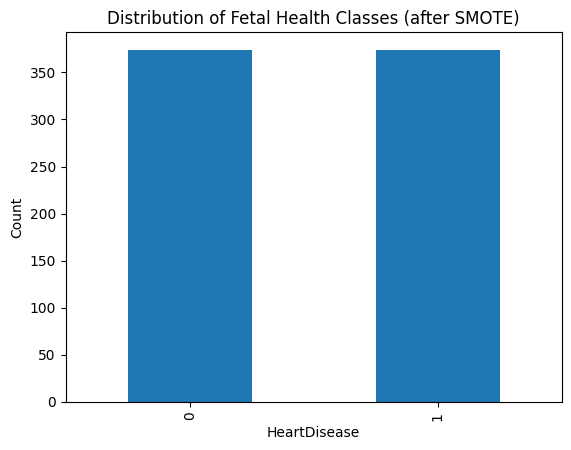

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate the features (X) and the target variable (y)

# Exclude columns with interval data
X = data.drop(['HeartDisease'], axis=1)  # Replace 'target_variable' with the actual name of your target variable column
y = data['HeartDisease']

# Instantiate the SMOTE object with random_state=42 (you can use any desired value)
smote = SMOTE(random_state=42)

# Apply SMOTE oversampling to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


# Convert the resampled data back to a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['HeartDisease'] = y_resampled


# Check the distribution of the target variable after oversampling
data_resampled['HeartDisease'].value_counts().plot(kind='bar')
plt.title("Distribution of Fetal Health Classes (after SMOTE)")
plt.xlabel("HeartDisease")
plt.ylabel("Count")


-------------------


<h3>Data split</h3>

In [ ]:
data_input = data.drop(columns=['HeartDisease'])
data_output = data['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


print('X_train: ',X_train_scaled.shape)
print('Y_train: ',y_train.shape)
print('-----------------------------')
print('X_test: ',X_test_scaled.shape)
print('y_test: ',y_test.shape)
print('-----------------------------')
print('X_val: ',y_val.shape)
print('y_val: ',X_val_scaled.shape)

X_train:  (344, 11)
Y_train:  (344,)
-----------------------------
X_test:  (211, 11)
y_test:  (211,)
-----------------------------
X_val:  (148,)
y_val:  (148, 11)


### K-nearst neighbour

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

n_neighbours_values = list(range(1, 110))
accuracy_train_values = []
accuracy_val_values = []

for n_neighbours in n_neighbours_values:
    model = KNeighborsClassifier(n_neighbors = n_neighbours)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)

results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

In [ ]:
results

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.547297
1,2,0.816860,0.574324
2,3,0.793605,0.601351
3,4,0.770349,0.601351
4,5,0.770349,0.635135
...,...,...,...
104,105,0.642442,0.614865
105,106,0.642442,0.608108
106,107,0.645349,0.621622
107,108,0.645349,0.621622


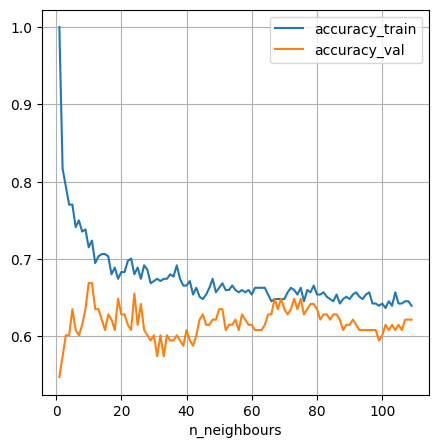

In [ ]:
%matplotlib inline

results.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(5, 5))
plt.grid(axis='both')

In [ ]:
data.shape

(703, 12)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=15)  # You can specify the number of neighbors (k) as desired

# Train the k-NN classifier
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = knn.predict(X_val)

# Evaluate the performance on the validation set (example using accuracy)
accuracy_val = knn.score(X_val, y_val)
print("Validation Accuracy:", accuracy_val)

# Predict on the test set
y_pred_test = knn.predict(X_test)

# Evaluate the performance on the test set (example using accuracy)
accuracy_test = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy_test)

# Predict on the training set
y_pred_train = knn.predict(X_train)

# Evaluate the performance on the training set (example using accuracy)
accuracy_train = knn.score(X_train, y_train)
print("Training Accuracy:", accuracy_train)


Validation Accuracy: 0.6081081081081081
Test Accuracy: 0.6966824644549763
Training Accuracy: 0.7063953488372093


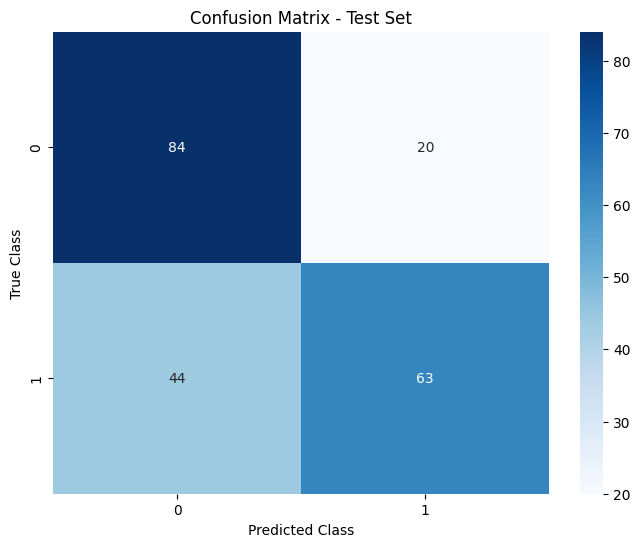

In [ ]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
# Evaluate the model on the validation set using recall
val_recall = recall_score(y_val, y_pred_val, average='weighted')
print(f'Validation Recall: {val_recall:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test setdt_classifier = model
dt_classifier = model

y_pred_test = dt_classifier.predict(X_test)

# Evaluate the model on the test set using recall
test_recall = recall_score(y_test, y_pred_test, average='weighted')
print(f'Test Recall: {test_recall:.2f}')



Validation Recall: 0.61
Test Recall: 0.66


In [ ]:
# Evaluate the model on the test set using precision
test_precision = precision_score(y_test, y_pred_test, average='weighted')
print(f'Test Precision: {test_precision:.2f}')

# Additionally, you can evaluate the model on the training set using precision
y_train_pred = knn.predict(X_train)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
print(f'Training Precision: {train_precision:.2f}')


Test Precision: 0.68
Training Precision: 0.71


In [ ]:
# Evaluate the model on the validation set using recall (sensitivity)
val_sensitivity = recall_score(y_val, y_pred_val, average='weighted')
print(f'Validation Sensitivity (Recall): {val_sensitivity:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred = knn.predict(X_test)

# Evaluate the model on the test set using recall (sensitivity)
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')
print(f'Test Sensitivity (Recall): {test_sensitivity:.2f}')

# Additionally, you can evaluate the model on the training set using recall (sensitivity)
y_train_pred = knn.predict(X_train)
train_sensitivity = recall_score(y_train, y_train_pred, average='weighted')
print(f'Training Sensitivity (Recall): {train_sensitivity:.2f}')

Validation Sensitivity (Recall): 0.61
Test Sensitivity (Recall): 0.70
Training Sensitivity (Recall): 0.71


In [ ]:
# Calculate confusion matrix for binary classification
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Calculate specificity
true_negatives = conf_matrix_val[0, 0]
false_positives = conf_matrix_val[0, 1]
specificity = true_negatives / (true_negatives + false_positives)

print(f'Validation Specificity: {specificity:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred = knn.predict(X_test)

# Calculate confusion matrix for binary classification on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate specificity on the test set
true_negatives_test = conf_matrix_test[0, 0]
false_positives_test = conf_matrix_test[0, 1]
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)

print(f'Test Specificity: {specificity_test:.2f}')



Validation Specificity: 0.89
Test Specificity: 0.81


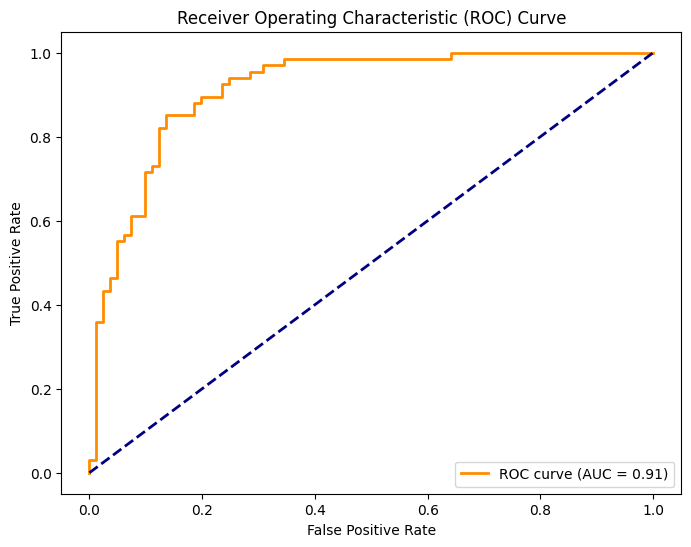

Test AUC: 0.75


In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC for the validation set
nb.fit(X_train, y_train)
y_prob_val=nb.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')


### Naive Bayes

- Gaussian Naive Bayes:
Gaussian Naive Bayes assumes that the features follow a Gaussian (normal) distribution. It is suitable for continuous numerical features. This classifier estimates the mean and standard deviation of each feature for each class and uses them to calculate the probability of a particular feature value belonging to a specific class.

- Multinomial Naive Bayes:
Multinomial Naive Bayes is designed for discrete features, particularly those that represent count or frequency-based data. It assumes that features have a multinomial distribution, commonly used in text classification tasks. This classifier calculates the probability of each feature occurring in each class and uses these probabilities to make predictions.

- Bernoulli Naive Bayes:
Bernoulli Naive Bayes is specifically designed for binary or Boolean features. It assumes that each feature follows a Bernoulli distribution, where it can take on one of two possible values: 0 or 1. This classifier calculates the probability of each feature being 0 or 1 in each class and uses these probabilities for prediction. It is commonly used in text classification tasks where features represent the presence or absence of words.

- Complement Naive Bayes:
Complement Naive Bayes is a variant of Naive Bayes that aims to handle imbalanced class distribution. It considers the complement of each feature's probability when estimating class conditional probabilities, giving more weight to the minority class. It effectively addresses class imbalance by estimating probabilities from the perspective of the majority class. Complement Naive Bayes can be useful in text classification tasks with imbalanced classes.

Each variant of Naive Bayes makes different assumptions about the data distribution and is suitable for different types of features and classification problems. It's important to choose the appropriate variant based on the nature of the data and the problem at hand to achieve accurate and reliable predictions.

In [ ]:
# Define the Bernoulli Naive Bayes model
nb = BernoulliNB()

# Fit the model to the training data
nb.fit(X_train, y_train)



BernoulliNB()

In [ ]:
# Evaluate the model's performance on the validation set
y_pred_val_bernoulli = nb.predict(X_val)
accuracy_val_bernoulli = accuracy_score(y_val, y_pred_val_bernoulli)

print("Validation accuracy:", accuracy_val_bernoulli * 100, "%")

# Evaluate the model's performance on the training set
y_pred_train_bernoulli = nb.predict(X_train)
accuracy_train_bernoulli = accuracy_score(y_train, y_pred_train_bernoulli)
print("Training accuracy:", accuracy_train_bernoulli * 100, "%")

# Evaluate the model's performance on the test set
y_pred_test_bernoulli = nb.predict(X_test)
accuracy_test_bernoulli = accuracy_score(y_test, y_pred_test_bernoulli)
print("Test accuracy:", accuracy_test_bernoulli * 100, "%")


Validation accuracy: 82.43243243243244 %
Training accuracy: 82.26744186046511 %
Test accuracy: 84.36018957345972 %


In [ ]:
from sklearn.metrics import precision_score
# Evaluate the model on the test set using precision
precision_test_bernoulli = precision_score(y_test, y_pred_test_bernoulli, average='weighted')
print(f'Test Precision: {precision_test_bernoulli:.2f}')

# Additionally, you can evaluate the model on the training set using precision
y_train_pred_bernoulli = nb.predict(X_train)
precision_train_bernoulli = precision_score(y_train, y_train_pred_bernoulli, average='weighted')
print(f'Training Precision: {precision_train_bernoulli:.2f}')

Test Precision: 0.85
Training Precision: 0.82


In [ ]:
from sklearn.metrics import recall_score
# Evaluate the model on the validation set using recall
recall_val_bernoulli = recall_score(y_val, y_pred_val_bernoulli, average='weighted')
print(f'Validation Recall: {recall_val_bernoulli:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred_bernoulli = nb.predict(X_test)

# Evaluate the model on the test set using recall
recall_test_bernoulli = recall_score(y_test, y_test_pred_bernoulli, average='weighted')
print(f'Test Recall: {recall_test_bernoulli:.2f}')

# Additionally, you can evaluate the model on the training set using recall
y_train_pred_bernoulli = nb.predict(X_train)
recall_train_bernoulli = recall_score(y_train, y_train_pred_bernoulli, average='weighted')
print(f'Training Recall: {recall_train_bernoulli:.2f}')

Validation Recall: 0.82
Test Recall: 0.84
Training Recall: 0.82


In [ ]:
# Evaluate the model on the validation set using sensitivity (recall)
sensitivity_val_bernoulli = recall_score(y_val, y_pred_val_bernoulli, average='weighted')
print(f'Validation Sensitivity (Recall): {sensitivity_val_bernoulli:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred_bernoulli = nb.predict(X_test)

# Evaluate the model on the test set using sensitivity (recall)
sensitivity_test_bernoulli = recall_score(y_test, y_test_pred_bernoulli, average='weighted')
print(f'Test Sensitivity (Recall): {sensitivity_test_bernoulli:.2f}')

# Additionally, you can evaluate the model on the training set using sensitivity (recall)
y_train_pred_bernoulli = nb.predict(X_train)
sensitivity_train_bernoulli = recall_score(y_train, y_train_pred_bernoulli, average='weighted')
print(f'Training Sensitivity (Recall): {sensitivity_train_bernoulli:.2f}')

Validation Sensitivity (Recall): 0.82
Test Sensitivity (Recall): 0.84
Training Sensitivity (Recall): 0.82


In [ ]:
# Calculate specificity for the validation set
true_negatives = conf_matrix_val[0, 0]
false_positives = conf_matrix_val[0, 1]
specificity_val_bernoulli = true_negatives / (true_negatives + false_positives)
print(f'Validation Specificity: {specificity_val_bernoulli:.2f}')

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_pred_bernoulli = nb.predict(X_test)

# Calculate confusion matrix for binary classification on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred_bernoulli)

# Calculate specificity for the test set
true_negatives_test = conf_matrix_test[0, 0]
false_positives_test = conf_matrix_test[0, 1]
specificity_test_bernoulli = true_negatives_test / (true_negatives_test + false_positives_test)
print(f'Test Specificity: {specificity_test_bernoulli:.2f}')


Validation Specificity: 0.69
Test Specificity: 0.88


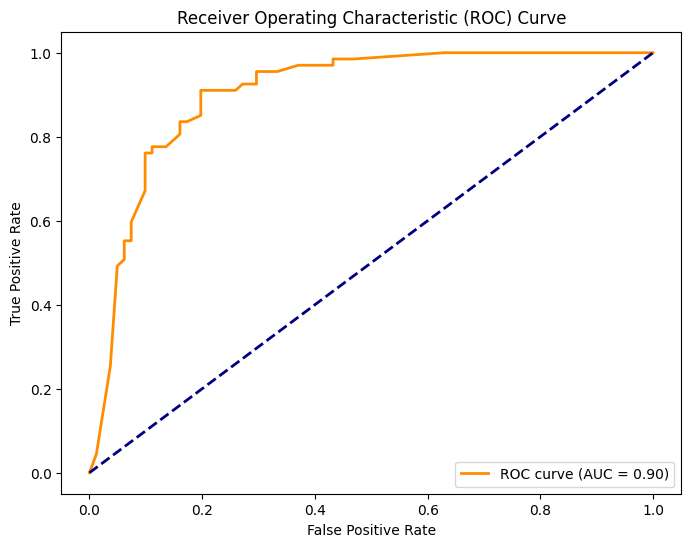

Test AUC: 0.92


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into X and y

# Define the Bernoulli Naive Bayes model
nb = BernoulliNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_prob_bernoulli = nb.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_bernoulli)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now, if you're satisfied with the model performance, you can evaluate it on the test set
y_test_prob_bernoulli = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob_bernoulli)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the AUC for the test set
print(f'Test AUC: {roc_auc_test:.2f}')

In [ ]:
# Define the guassian Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Evaluate the model's performance on the validation set
y_pred_val_guassian = nb.predict(X_val)
accuracy_val_guassian = accuracy_score(y_val, y_pred_val_guassian)

print("Validation accuracy:", accuracy_val_guassian * 100, "%")

# Evaluate the model's performance on the training set
y_pred_train_guassian = nb.predict(X_train)
accuracy_train_guassian = accuracy_score(y_train, y_pred_train_guassian)
print("Training accuracy:", accuracy_train_guassian * 100, "%")

# Evaluate the model's performance on the test set
y_pred_test_guassian = nb.predict(X_test)
accuracy_test_guassian = accuracy_score(y_test, y_pred_test_guassian)
print("Test accuracy:", accuracy_test_guassian * 100, "%")


Validation accuracy: 84.45945945945947 %
Training accuracy: 83.43023255813954 %
Test accuracy: 82.93838862559242 %


In [ ]:
from sklearn.naive_bayes import ComplementNB
# Define the guassian Naive Bayes model
nb = ComplementNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Evaluate the model's performance on the validation set
y_pred_val_Complement = nb.predict(X_val)
accuracy_val_Complement = accuracy_score(y_val, y_pred_val_Complement)

print("Validation accuracy:", accuracy_val_Complement * 100, "%")

# Evaluate the model's performance on the training set
y_pred_train_Complement = nb.predict(X_train)
accuracy_train_Complement = accuracy_score(y_train, y_pred_train_Complement)
print("Training accuracy:", accuracy_train_Complement * 100, "%")

# Evaluate the model's performance on the test set
y_pred_test_Complement = nb.predict(X_test)
accuracy_test_Complement = accuracy_score(y_test, y_pred_test_Complement)
print("Test accuracy:", accuracy_test_Complement * 100, "%")

Validation accuracy: 80.4054054054054 %
Training accuracy: 78.19767441860465 %
Test accuracy: 80.09478672985783 %


In [ ]:
results = pd.DataFrame({
    'model': ['GaussianNB', 'ComplementNB', 'BernoulliNB', 'MultinomialNB'],
    'acc_train': [accuracy_train_guassian, accuracy_train_Complement, accuracy_train_bernoulli,accuracy_train_Complement],
    'acc_val': [accuracy_val_guassian, accuracy_val_Complement, accuracy_val_bernoulli,accuracy_val_Complement],
})

results

,model,acc_train,acc_val
0,GaussianNB,0.834302,0.844595
1,ComplementNB,0.781977,0.804054
2,BernoulliNB,0.822674,0.824324
3,MultinomialNB,0.781977,0.804054


<Axes: xlabel='model'>

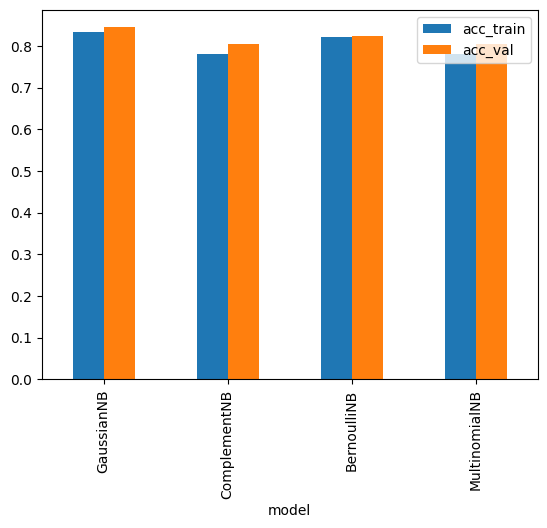

In [ ]:
results.plot.bar(x='model', y=['acc_train', 'acc_val'])

observitions guassianNb has the highest accurcy on both train and value hence we choose the guaasian nb as the main naive bayes model

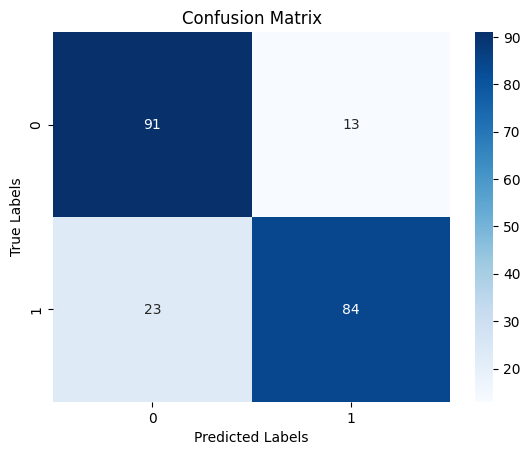

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_guassian)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Define the model
nb = GaussianNB()

# Define the hyperparameter grid to search over
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print('Best hyperparameters:', grid_search.best_params_)
print('Training accuracy:', grid_search.best_score_*100 ,"%")

# Evaluate the model on the test set
y_pred_nb_hyper = grid_search.predict(X_test)
NB_test_score= accuracy_score(y_test, y_pred_nb_hyper)
print('Test accuracy:', NB_test_score*100 ,"%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'var_smoothing': 5.3366992312063123e-05}
Training accuracy: 84.0153452685422 %
Test accuracy: 83.88625592417061 %


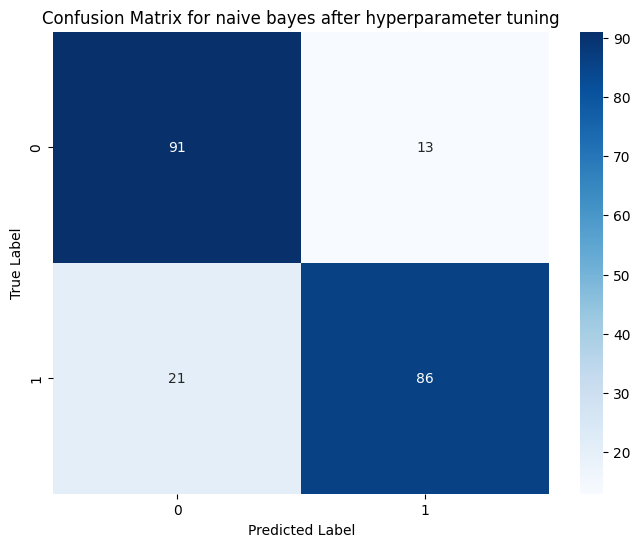

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb_hyper)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for naive bayes after hyperparameter tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=12)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf.predict(X_val)

# Evaluate the model's performance on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation accuracy:", accuracy_val * 100, "%")
# Predict on the test set
y_pred_test = rf.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", accuracy_test * 100, "%")
print(classification_report(y_test, y_pred_test))


Validation accuracy: 87.83783783783784 %
Test accuracy: 86.25592417061611 %
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       104
           1       0.88      0.85      0.86       107

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



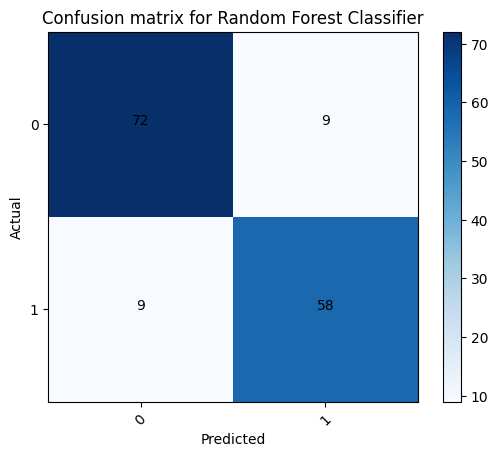

In [ ]:

cm = confusion_matrix(y_val, y_pred_val)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), horizontalalignment="center", color="black")
tick_marks = np.arange(len(np.unique(y_val)))
plt.xticks(tick_marks, np.unique(y_val), rotation=45)
plt.yticks(tick_marks, np.unique(y_val))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=12)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print('Best hyperparameters:', grid_search.best_params_)
print('Training accuracy:', grid_search.best_score_ * 100, "%")

# Evaluate the model on the validation set using the best estimator
best_rf = grid_search.best_estimator_
y_pred_val = best_rf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print('Validation accuracy:', accuracy_val * 100, "%")

# Evaluate the model on the test set using the best estimator
y_pred_test = best_rf.predict(X_test)
RF_test_score = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', RF_test_score * 100, "%")


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training accuracy: 85.17476555839727 %
Validation accuracy: 87.83783783783784 %
Test accuracy: 86.7298578199052 %


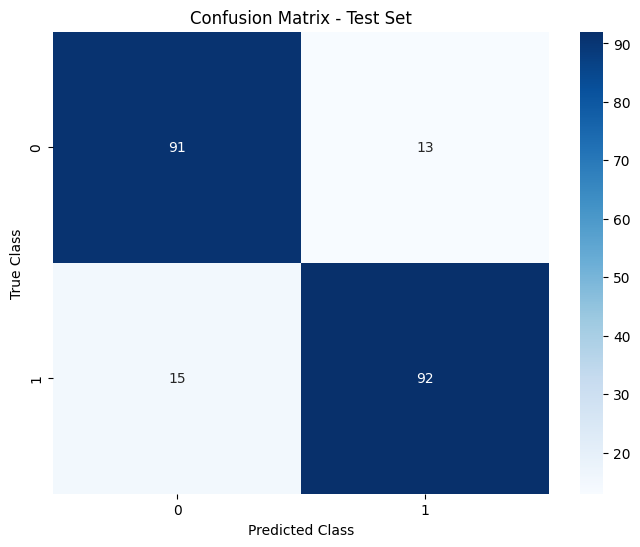

In [ ]:
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Logestic Regression

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Create an instance of LogisticRegression
logistic_regression = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = logistic_regression.predict(X_train)

# Make predictions on the validation data
y_pred_val = logistic_regression.predict(X_val)

# Make predictions on the test data
y_pred_test = logistic_regression.predict(X_test)

# Calculate the accuracy of the model on training, validation, and test data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Training Accuracy:", accuracy_train)
print("Validation Accuracy:", accuracy_val)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.8226744186046512
Validation Accuracy: 0.8513513513513513
Test Accuracy: 0.8246445497630331


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings

# Feature Selection
selector = SelectKBest(k=10)  # Select top 10 features (adjust k as needed)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Define the logistic regression model
logistic = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1.0, 10.0,100.0, 1000.0,10000.0],  # Regularization parameter
}

# Create a GridSearchCV object and fit it to the training data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search = GridSearchCV(logistic, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy scores
print("Best hyperparameters:", grid_search.best_params_)
print("Training accuracy:", grid_search.best_score_ * 100, "%")

# Evaluate the performance on the validation set using the best estimator
best_logistic = grid_search.best_estimator_
y_pred_val = best_logistic.predict(X_val_scaled)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation accuracy:", accuracy_val * 100, "%")

# Predict on the test set using the best estimator
y_pred_test = best_logistic.predict(X_test_scaled)
LR_test_score = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", LR_test_score * 100, "%")

# Print the classification report for the test set
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'C': 10.0}
Training accuracy: 83.14151747655585 %
Validation accuracy: 85.13513513513513 %
Test accuracy: 83.41232227488152 %
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       104
           1       0.84      0.83      0.84       107

    accuracy                           0.83       211
   macro avg       0.83      0.83      0.83       211
weighted avg       0.83      0.83      0.83       211



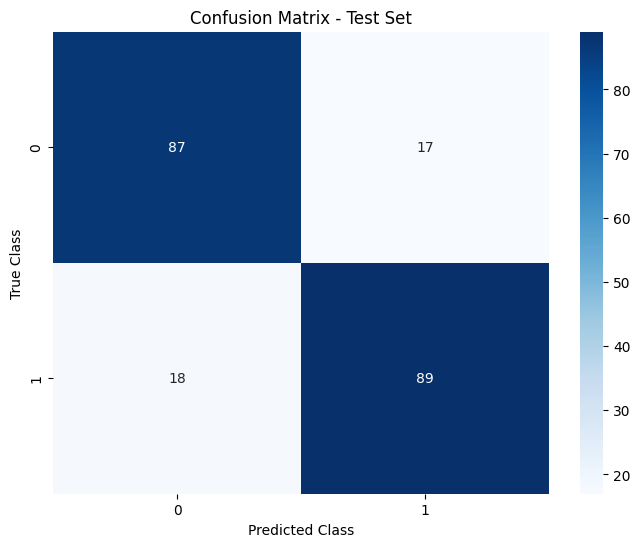

In [ ]:
cm_test_logistic = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")plt.show()

In [ ]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,100000,1000000]
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0))
    ])
    model.fit(X_train, y_train)
    acc_train = model.score(X_train, y_train)
    acc_val = model.score(X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})


,C,acc_train,acc_val
0,0.0001,0.549419,0.547297
1,0.0010,0.796512,0.770270
2,0.0100,0.834302,0.851351
3,0.1000,0.825581,0.858108
4,1.0000,0.825581,0.851351
5,10.0000,0.828488,0.851351
6,100.0000,0.828488,0.851351
7,1000.0000,0.828488,0.851351
8,10000.0000,0.828488,0.851351
9,100000.0000,0.828488,0.851351


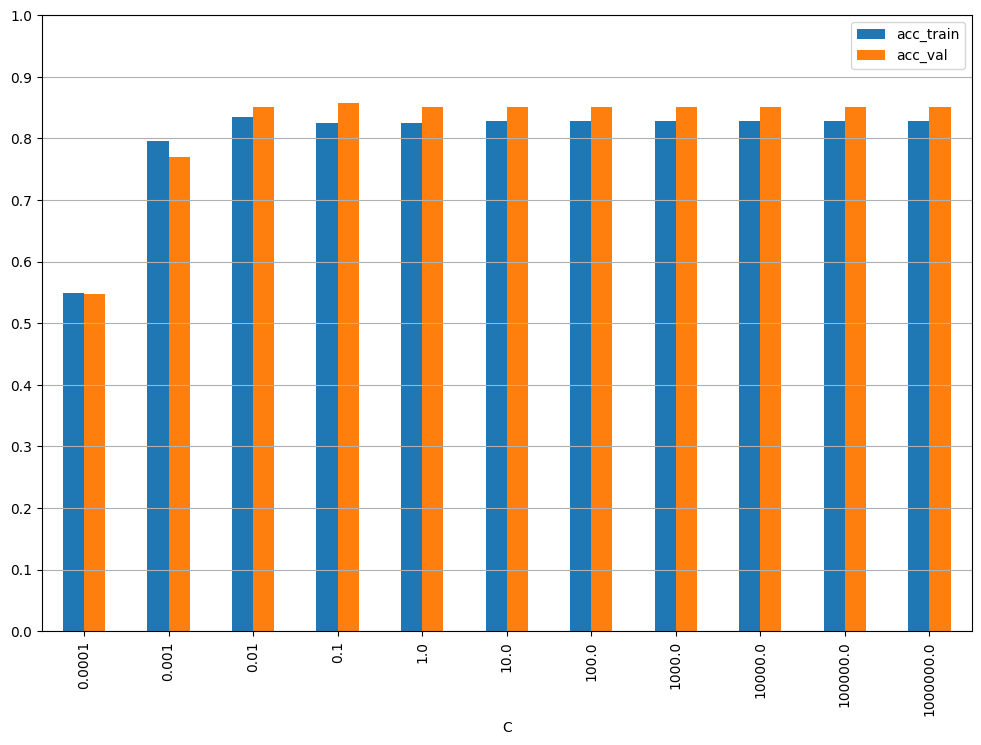

In [ ]:
%matplotlib inline

results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a LogisticRegression model with C=10
model = LogisticRegression(C=10, max_iter=1000)

# Fit the model to your training data
model.fit(X_train, y_train)

# Predict the labels for training and validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate the accuracy scores
accuracy_train = accuracy_score (y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
# Predict the labels for the test data
y_pred_test = model.predict(X_test)

print("Accuracy on test data:", accuracy_test)
print("Accuracy on training data:", accuracy_train)
print("Accuracy on validation data:", accuracy_val)



Accuracy on test data: 0.8246445497630331
Accuracy on training data: 0.8284883720930233
Accuracy on validation data: 0.8513513513513513


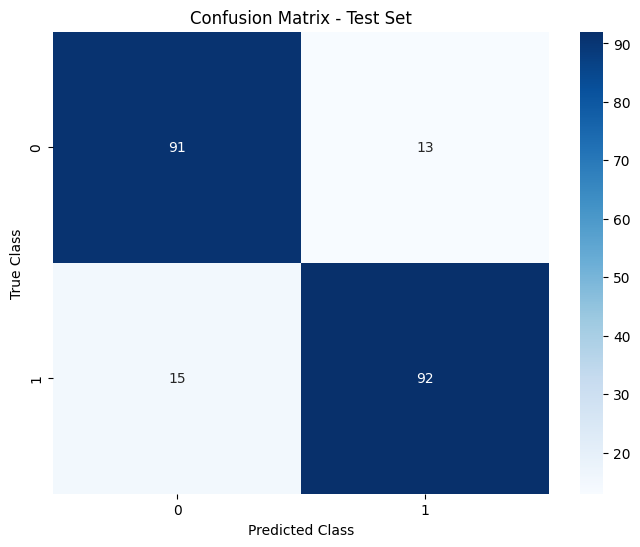

In [ ]:

# Predict on the test set
y_pred_test = grid_search.predict(X_test)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

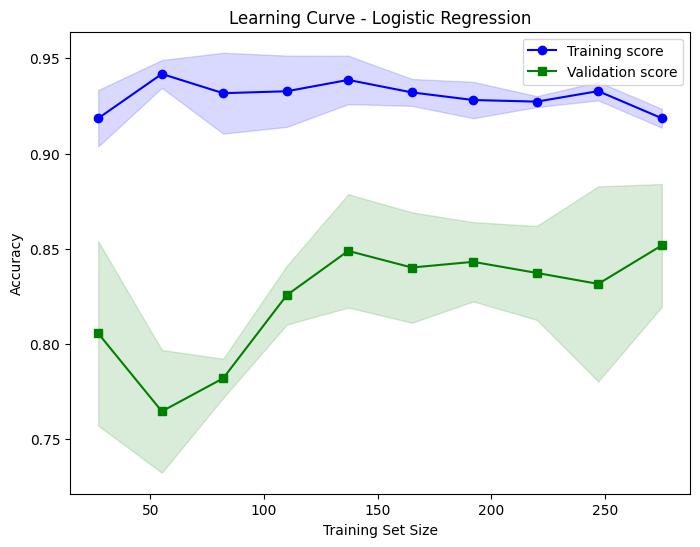

In [ ]:
logistic = grid_search.best_estimator_

# Define the range of training set sizes to plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(logistic, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and validation scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation score', color='green', marker='s')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.show()

s
### Model Evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest','Naive Bayes',
              ],
    'Score': [accuracy_test, LR_test_score,
              RF_test_score,NB_test_score
              ]})
models.sort_values(by='Score', ascending=False).style.background_gradient(cmap='Reds')

,Model,Score
2,Random Forest,0.867299
3,Naive Bayes,0.838863
1,Logistic Regression,0.834123
0,KNN,0.824645


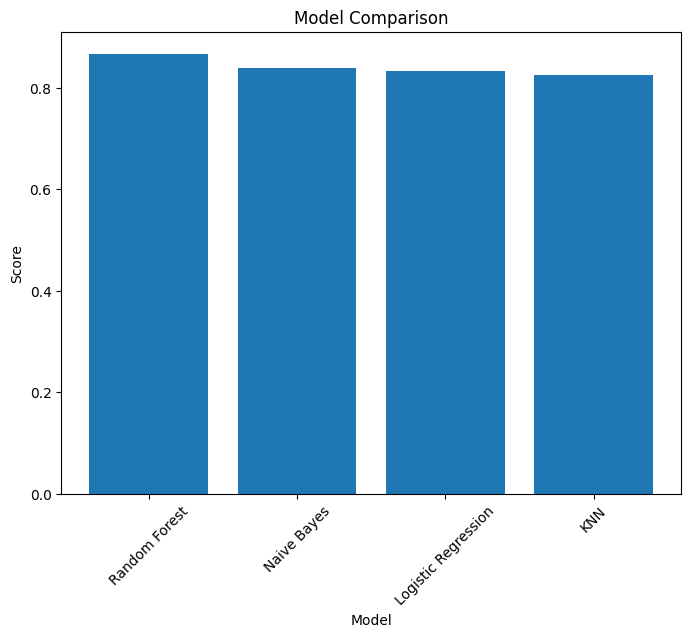

In [ ]:
models_sorted = models.sort_values(by='Score', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(models_sorted['Model'], models_sorted['Score'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()


The best model based on the test accuracy among the options provided is the Random Forest model, which achieved a test accuracy of 0.867299.

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It works by creating a set of decision trees on random subsets of the training data and then averaging their predictions to obtain the final result. This approach helps to reduce overfitting and improve generalization.

The choice of Random Forest as the best model is made because it achieved the highest test accuracy among the listed models. With a test accuracy of 0.867299, it outperformed the other models, including Naive Bayes, Logistic Regression, Support Vector Machines, and KNN.

The high accuracy of the Random Forest model on the test data suggests that it has learned meaningful patterns and relationships from the training data that allow it to make accurate predictions on unseen data. The ensemble nature of Random Forest helps in capturing complex interactions between features and leads to robust predictions.

It's important to note that the choice of the best model depends on the specific dataset and problem at hand. While Random Forest performed well in this case, it's always recommended to evaluate multiple models and consider various performance metrics, such as precision, recall, and F1 score, in addition to accuracy, to make a more comprehensive assessment of the models' performance.